In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

plt.rcParams['font.family'] = 'Arial'

import warnings
warnings.filterwarnings("ignore")

In [2]:
# "Beta diversity analysis was performed using MicrobiomeAnalyst."
# https://www.microbiomeanalyst.ca/

file_path = './Data/diversity_summary_250403.xlsx'

df_bc = pd.read_excel(file_path, sheet_name='g_bray_curtis').set_index('sampleid')
df_weight = pd.read_excel(file_path, sheet_name='f_weighted').set_index('sampleid')

orders = ['Control', 'Chickpea']
g_colors = ['lightcoral', 'lightseagreen']

In [3]:
# b-diveristy

def plot_confidence_ellipse(data, confidence_level=0.90):
    # 중심점 계산
    mean_x, mean_y = np.mean(data, axis=0)
    
    # 공분산 행렬 계산
    cov_matrix = np.cov(data, rowvar=False)
    
    # 고유값 분해
    eigvals, eigvecs = np.linalg.eigh(cov_matrix)
    
    # 신뢰도 수준 스케일링
    # 90% 신뢰 구간을 위해 chi-square 값의 제곱근을 사용 (2차원에서는 약 4.605)
    if confidence_level == 0.95 :
        chi_square_val = 5.991
    elif confidence_level == 0.90 :
        chi_square_val = 4.605
    elif confidence_level == 0.8 :
        chi_square_val = 3.219
    else:
        raise ValueError('CI')

    scale = np.sqrt(chi_square_val)
    
    # 반지름 계산
    width, height = 2 * scale * np.sqrt(eigvals)
    
    # 타원의 회전각 계산 (라디안에서 도 단위로 변환)
    angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))

    return (mean_x, mean_y), width, height, angle

def cal_ellipse(data, group_name, component1='Component1', componet2='Component2', cl=0.9):
    data = data[data.group == group_name]
    data = data[[component1, componet2]].values

    (mean_x, mean_y), width, height, angle = plot_confidence_ellipse(data, confidence_level=cl)

    return (mean_x, mean_y), width, height, angle


In [4]:
# group 을 추가해서
df_weight.head(2)

,PC1,PC2,Axis.3,Axis.4,Axis.5,Axis.6,Axis.7,Axis.8,Axis.9,Axis.10,Axis.11,Axis.12,Axis.13,Axis.14,Axis.15,group
sampleid,,,,,,,,,,,,,,,,
Sub002.H04,-0.083228,0.018496,-0.020977,0.016948,-0.028473,0.000570,-0.021366,0.011348,-0.004974,0.016531,0.015728,-0.002052,-0.009600,-0.005110,0.001699,Control
Sub003.H04,-0.002691,0.034593,-0.022924,0.001377,0.002542,-0.034494,-0.009133,-0.023934,0.000799,0.001537,-0.000486,-0.017555,0.016362,-0.007554,-0.000844,Control


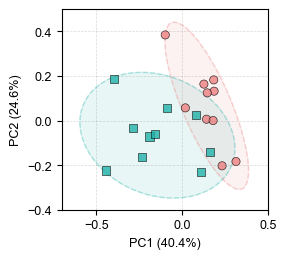

In [5]:
marker_size = 35
alpha = 0.8
is_ellipse = True

# fig, ax = plt.figure(figsize=(5, 4))
fig, ax = plt.subplots(figsize=(3., 2.7))


data = df_bc

group_name = ['Control', 'Chickpea']
g_colors = ['lightcoral', 'lightseagreen']
markers=['o', 's', 'D', '^', '>', '<']


if is_ellipse:
    alpha=0.1
    (mean_x, mean_y), width, height, angle = cal_ellipse(data, group_name=group_name[0], cl=0.9, component1='PC1', componet2='PC2')
    ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle, edgecolor=g_colors[0], facecolor=g_colors[0], alpha=alpha)
    ax.add_patch(ellipse)

    (mean_x, mean_y), width, height, angle = cal_ellipse(data, group_name=group_name[1], cl=0.9, component1='PC1', componet2='PC2')
    ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle, edgecolor=g_colors[1], facecolor=g_colors[1], alpha=alpha)
    ax.add_patch(ellipse)



    alpha=0.3
    (mean_x, mean_y), width, height, angle = cal_ellipse(data, group_name=group_name[0], cl=0.9, component1='PC1', componet2='PC2')
    ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle, edgecolor=g_colors[0], facecolor='none', alpha=alpha, linestyle='--')
    ax.add_patch(ellipse)

    (mean_x, mean_y), width, height, angle = cal_ellipse(data, group_name=group_name[1], cl=0.9, component1='PC1', componet2='PC2')
    ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle, edgecolor=g_colors[1], facecolor='none', alpha=alpha, linestyle='--')
    ax.add_patch(ellipse)




alpha = 0.8
sns.scatterplot(data=data, x='PC1', y='PC2', hue='group', s=marker_size, alpha=alpha, palette=g_colors, edgecolor='k', style='group',markers=['o', 's', 'D', '^', '>', '<'])

if True:
    plt.xlabel(f'PC1 (40.4%)', fontsize=9)
    plt.ylabel(f'PC2 (24.6%)', fontsize=9)
    plt.xticks(fontsize=9,)
    plt.yticks(fontsize=9)
    #plt.legend( bbox_to_anchor=(1.01, 1.01), fontsize=12)
    plt.gca().get_legend().remove()


    #plt.yticks([-0.3, -0.15, 0, 0.15, 0.3])
    plt.xlim(-0.7, 0.5)
    plt.ylim(-0.4, 0.5)


    plt.tight_layout()
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
    # plt.savefig('./output_figure/beta_diversity_BC.png', dpi=600)

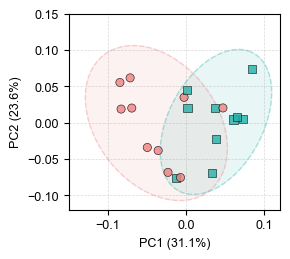

In [6]:
marker_size = 35
alpha = 0.8
is_ellipse = True

# fig, ax = plt.figure(figsize=(5, 4))
fig, ax = plt.subplots(figsize=(3., 2.7))


data = df_weight

group_name = ['Control', 'Chickpea']
g_colors = ['lightcoral', 'lightseagreen']
markers=['o', 's', 'D', '^', '>', '<']


if is_ellipse:
    alpha=0.1
    (mean_x, mean_y), width, height, angle = cal_ellipse(data, group_name=group_name[0], cl=0.9, component1='PC1', componet2='PC2')
    ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle, edgecolor=g_colors[0], facecolor=g_colors[0], alpha=alpha)
    ax.add_patch(ellipse)

    (mean_x, mean_y), width, height, angle = cal_ellipse(data, group_name=group_name[1], cl=0.9, component1='PC1', componet2='PC2')
    ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle, edgecolor=g_colors[1], facecolor=g_colors[1], alpha=alpha)
    ax.add_patch(ellipse)



    alpha=0.3
    (mean_x, mean_y), width, height, angle = cal_ellipse(data, group_name=group_name[0], cl=0.9, component1='PC1', componet2='PC2')
    ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle, edgecolor=g_colors[0], facecolor='none', alpha=alpha, linestyle='--')
    ax.add_patch(ellipse)

    (mean_x, mean_y), width, height, angle = cal_ellipse(data, group_name=group_name[1], cl=0.9, component1='PC1', componet2='PC2')
    ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle, edgecolor=g_colors[1], facecolor='none', alpha=alpha, linestyle='--')
    ax.add_patch(ellipse)




alpha = 0.8
sns.scatterplot(data=data, x='PC1', y='PC2', hue='group', s=marker_size, alpha=alpha, palette=g_colors, edgecolor='k', style='group',markers=['o', 's', 'D', '^', '>', '<'])

if True:
    plt.xlabel(f'PC1 (31.1%)', fontsize=9)
    plt.ylabel(f'PC2 (23.6%)', fontsize=9)
    plt.xticks(fontsize=9,)
    plt.yticks(fontsize=9)
    #plt.legend( bbox_to_anchor=(1.01, 1.01), fontsize=12)
    plt.gca().get_legend().remove()


    #plt.yticks([-0.3, -0.15, 0, 0.15, 0.3])
    plt.xlim(-0.15, 0.12)
    plt.ylim(-0.12, 0.15)


    plt.tight_layout()
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
    # plt.savefig('./output_figure/weighted_pcoa.png', dpi=600)